In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings




In [67]:
df=pd.read_csv('C:\\Users\pbhar\\Ml_Project(end to end)\\notebook\\StudentsPerformance.csv')

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
X=df.drop(columns=['math score'],axis=1)

In [70]:
y=df['math score']

In [71]:
from sklearn.compose import ColumnTransformer

num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
ohe=OneHotEncoder()
ss=StandardScaler()

ct=ColumnTransformer(
    [
        ('One hot encoding',ohe,cat_features),
        ('standard scaler',ss,num_features)
    ]
)

In [72]:
X=ct.fit_transform(X)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an Evaluate function to give all metrics

In [74]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    r2=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mse,rmse,mae,r2


In [60]:
models={
    "LinearRegression":LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighbour regressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'AdaboostRegressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    mse_train,rmse_train,mae_train,r2_train=evaluate_model(y_train,y_train_pred)

    mse_test,rmse_test,mae_test,r2_test=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance on training set')
    print(' mean square error:{:.4f}'.format(mse_train))
    print('root mean square error:{:.4f}'.format(rmse_train))
    print('mean absolute error {:.4f}'.format(mae_train))
    print('r2_score {:.4f}'.format(r2_train))

    print('-'*10)

    print('Model performance on test set')
    print(' mean square error:{:.4f}'.format(mse_test))
    print('root mean square error:{:.4f}'.format(rmse_test))
    print('mean absolute error {:.4f}'.format(mae_test))
    print('r2_score {:.4f}'.format(r2_test))

    r2_list.append(r2_test)


    print('='*18)
    print('\n')

    





LinearRegression
Model performance on training set
 mean square error:28.3349
root mean square error:5.3231
mean absolute error 4.2667
r2_score 0.8743
----------
Model performance on test set
 mean square error:29.0952
root mean square error:5.3940
mean absolute error 4.2148
r2_score 0.8804


Lasso
Model performance on training set
 mean square error:43.4784
root mean square error:6.5938
mean absolute error 5.2063
r2_score 0.8071
----------
Model performance on test set
 mean square error:42.5064
root mean square error:6.5197
mean absolute error 5.1579
r2_score 0.8253


Ridge
Model performance on training set
 mean square error:28.3378
root mean square error:5.3233
mean absolute error 4.2650
r2_score 0.8743
----------
Model performance on test set
 mean square error:29.0563
root mean square error:5.3904
mean absolute error 4.2111
r2_score 0.8806


KNeighbour regressor
Model performance on training set
 mean square error:32.5934
root mean square error:5.7091
mean absolute error 4.5175
r

In [61]:
df2=pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

In [62]:
df2

,model name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.850438
8,AdaboostRegressor,0.844346
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighbour regressor,0.783497
4,DecisionTreeRegressor,0.735656


In [63]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f'r2 score is:{score}')

r2 score is:0.8805931485028737


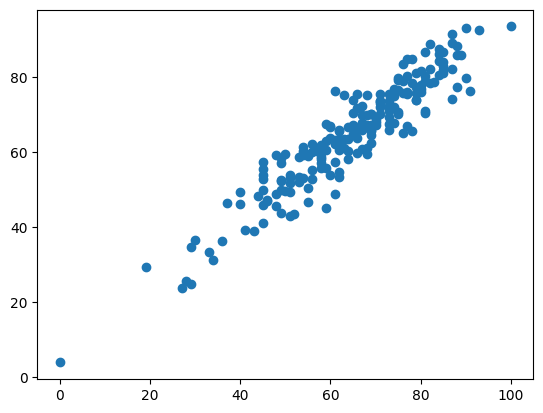

In [64]:
plt.scatter(y_test,y_pred)
plt.show()

<Axes: xlabel='math score'>

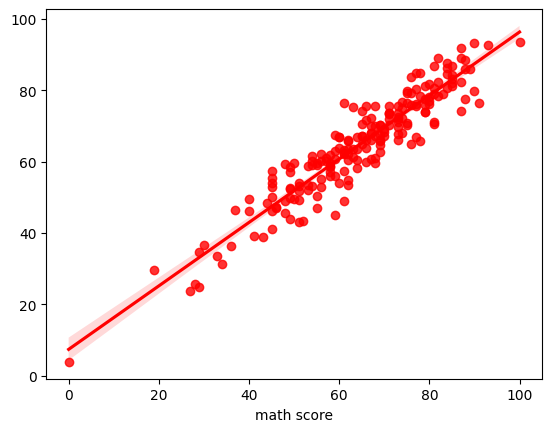

In [65]:
sns.regplot(x=y_test,y=y_pred,color='red')

Difference between actual and predicted values

In [75]:
pred_df=pd.DataFrame({
    'Actual value':y_test,
    'Predicted value':y_pred,
    'Difference':y_test-y_pred
})

In [76]:
pred_df

,Actual value,Predicted value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
